### Turns out this notebook is bullshit for as long as I can not feed a neural network which inherits nn.module with data from my class

#### This notebook provides several classes which all inherit torch.utils.data.Dataset and use different means to get your data right

In [94]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
class CustomDataset(Dataset):
    def __init__(self, name, root, filename, transform=None):
        self.filename = filename
        self.root = root
        self.name = name
        xy = np.loadtxt('{}/{}'.format(root, filename), delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, 0])
        self.n_samples = xy.shape[0]
        self.transform = transform
        
    def __repr__(self):
        transform_repr = repr(self.transform) if self.transform else 'None'
        return (f"Dataset {self.name}\n"
                f"    Number of datapoints: {self.n_samples}\n"
                f"    Root location: {self.root}\n"
                f"    Filename: {self.filename}\n"
                f"    Transform: {transform_repr}")
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples   
    
    def train_test_split(self, test_size=.2):
        return train_test_split(self.x, self.y, test_size=test_size)        

In [3]:
#here we create an instance of the class above and look at x_1 and corresponding y_1
dataset = CustomDataset(name='wine', root='./data', filename='wine.csv')
feature, label = dataset[0]
len(dataset), feature, label

(178,
 tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor(1.))

In [4]:
#here we are using the method train_test_split to split or data into a train and test dataset.
test_train_data = dataset.train_test_split(test_size=0.1)
X_train, X_test, y_train, y_test = test_train_data

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([160, 13]),
 torch.Size([160]),
 torch.Size([18, 13]),
 torch.Size([18]))

In [6]:
#but we need the data to be inside the class instances so we create our to instances and overwrite the internal data.
train_data = CustomDataset(name='wine', root='./data', filename='wine.csv')
test_data = CustomDataset(name='wine', root='./data', filename='wine.csv')

In [7]:
#following chatgpt's suggestion to just overwrite the internal data
#scroll down for a better solution
train_data.x = X_train; train_data.y = y_train
train_data.n_samples = X_train.shape[0]

test_data.x = X_test; test_data.y = y_test
test_data.n_samples = X_test.shape[0]

In [8]:
train_data

Dataset wine
    Number of datapoints: 160
    Root location: ./data
    Filename: wine.csv
    Transform: None

In [9]:
test_data

Dataset wine
    Number of datapoints: 18
    Root location: ./data
    Filename: wine.csv
    Transform: None

In [10]:
#the purpose of the class which inherits torch.utils.data.Dataset is that it now is in 
#the right format to be passed into the torch.utils.data.DataLoader function.
#This function will feed data into the neural_networks
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [11]:
dataiter = iter(dataloader)
data = next(dataiter)
data

[tensor([[1.2170e+01, 1.4500e+00, 2.5300e+00, 1.9000e+01, 1.0400e+02, 1.8900e+00,
          1.7500e+00, 4.5000e-01, 1.0300e+00, 2.9500e+00, 1.4500e+00, 2.2300e+00,
          3.5500e+02],
         [1.4390e+01, 1.8700e+00, 2.4500e+00, 1.4600e+01, 9.6000e+01, 2.5000e+00,
          2.5200e+00, 3.0000e-01, 1.9800e+00, 5.2500e+00, 1.0200e+00, 3.5800e+00,
          1.2900e+03],
         [1.3340e+01, 9.4000e-01, 2.3600e+00, 1.7000e+01, 1.1000e+02, 2.5300e+00,
          1.3000e+00, 5.5000e-01, 4.2000e-01, 3.1700e+00, 1.0200e+00, 1.9300e+00,
          7.5000e+02],
         [1.2290e+01, 1.6100e+00, 2.2100e+00, 2.0400e+01, 1.0300e+02, 1.1000e+00,
          1.0200e+00, 3.7000e-01, 1.4600e+00, 3.0500e+00, 9.0600e-01, 1.8200e+00,
          8.7000e+02]]),
 tensor([2., 1., 2., 2.])]

In [12]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
total_samples, n_iterations, len(list(dataloader))

(178, 45, 45)

In [13]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i+1) % 5 == 0:
            print('{}/{}, step {}/{}, input.shape = {}'.format(epoch+1, num_epochs, i+1,
                                                               n_iterations, inputs.shape[0]))

1/2, step 5/45, input.shape = 4
1/2, step 10/45, input.shape = 4
1/2, step 15/45, input.shape = 4
1/2, step 20/45, input.shape = 4
1/2, step 25/45, input.shape = 4
1/2, step 30/45, input.shape = 4
1/2, step 35/45, input.shape = 4
1/2, step 40/45, input.shape = 4
1/2, step 45/45, input.shape = 2
2/2, step 5/45, input.shape = 4
2/2, step 10/45, input.shape = 4
2/2, step 15/45, input.shape = 4
2/2, step 20/45, input.shape = 4
2/2, step 25/45, input.shape = 4
2/2, step 30/45, input.shape = 4
2/2, step 35/45, input.shape = 4
2/2, step 40/45, input.shape = 4
2/2, step 45/45, input.shape = 2


In [14]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [15]:
train_dataset = datasets.MNIST(root='/data', train=True, download=True,
                               transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:02<00:00, 3722962.86it/s]


Extracting /data\MNIST\raw\train-images-idx3-ubyte.gz to /data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 290734.50it/s]


Extracting /data\MNIST\raw\train-labels-idx1-ubyte.gz to /data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 2286090.16it/s]


Extracting /data\MNIST\raw\t10k-images-idx3-ubyte.gz to /data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4540164.15it/s]

Extracting /data\MNIST\raw\t10k-labels-idx1-ubyte.gz to /data\MNIST\raw



In [16]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [17]:
dataset

Dataset wine
    Number of datapoints: 178
    Root location: ./data
    Filename: wine.csv
    Transform: None

In [18]:
train_dataset[0][1]

5

In [19]:
dataloader2 = DataLoader(train_dataset, batch_size=4, shuffle=True)

In [20]:
#Dataset where numpy is used to read a csv file, where the first row are the labels and the first column 
#is goint go be y. It should be easy to change your y or scroll down for a class which gets a pandas df as input
class CustomDataset(Dataset):
    def __init__(self, name, root, filename, train, transform=None, test_size=.2):
        from sklearn.model_selection import train_test_split
        self.filename = filename
        self.root = root
        self.name = name
        xy = np.loadtxt('{}/{}'.format(root, filename), delimiter=',', dtype=np.float32, skiprows=1)
        self.xtemp = torch.from_numpy(xy[:, 1:])
        self.ytemp = torch.from_numpy(xy[:, 0])
        self.transform = transform
        self.train = train
        self.test_size = test_size
        self.x, self.y = self.split()
        self.n_samples = self.x.shape[0]
        
    def split(self):
        X_train, X_test, y_train, y_test = train_test_split(self.xtemp,
                                                            self.ytemp, 
                                                            test_size=self.test_size,
                                                            random_state=42)
        if self.train:
            return X_train, y_train
        else:
            return X_test, y_test
    
    def __repr__(self):
        transform_repr = repr(self.transform) if self.transform else 'None'
        return (f"Dataset {self.name}\n"
                f"    Number of datapoints: {self.n_samples}\n"
                f"    Root location: {self.root}\n"
                f"    Filename: {self.filename}\n"
                f"    Transform: {transform_repr}")

    #this should do
    def __getitem__(self, index):
        x, y = self.x[index], self.y[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return self.n_samples   

In [21]:
#the random_state parameter will ensure that the same split is happening for both class instances. Right?
train_dataset = CustomDataset(name='wine', root='./data', filename='wine.csv', train=True, test_size=.1)
test_dataset = CustomDataset(name='wine', root='./data', filename='wine.csv', train=False, test_size=.1)

In [22]:
train_dataset

Dataset wine
    Number of datapoints: 160
    Root location: ./data
    Filename: wine.csv
    Transform: None

In [23]:
train_dataset[0]

(tensor([1.3860e+01, 1.3500e+00, 2.2700e+00, 1.6000e+01, 9.8000e+01, 2.9800e+00,
         3.1500e+00, 2.2000e-01, 1.8500e+00, 7.2200e+00, 1.0100e+00, 3.5500e+00,
         1.0450e+03]),
 tensor(1.))

In [24]:
test_dataset

Dataset wine
    Number of datapoints: 18
    Root location: ./data
    Filename: wine.csv
    Transform: None

In [25]:
dataloader3 = DataLoader(train_dataset, batch_size=4, shuffle=True)

In [166]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader3):
        if (i+1) % 5 == 0:
            print('{}/{}, step {}/{}, input.shape = {}'.format(epoch+1,
                                                               num_epochs,
                                                               i+1,
                                                               n_iterations,
                                                               inputs.shape[0]))

1/4, step 5/45, input.shape = 4
1/4, step 10/45, input.shape = 4
1/4, step 15/45, input.shape = 4
1/4, step 20/45, input.shape = 4
1/4, step 25/45, input.shape = 4
1/4, step 30/45, input.shape = 4
1/4, step 35/45, input.shape = 4
1/4, step 40/45, input.shape = 4
2/4, step 5/45, input.shape = 4
2/4, step 10/45, input.shape = 4
2/4, step 15/45, input.shape = 4
2/4, step 20/45, input.shape = 4
2/4, step 25/45, input.shape = 4
2/4, step 30/45, input.shape = 4
2/4, step 35/45, input.shape = 4
2/4, step 40/45, input.shape = 4
3/4, step 5/45, input.shape = 4
3/4, step 10/45, input.shape = 4
3/4, step 15/45, input.shape = 4
3/4, step 20/45, input.shape = 4
3/4, step 25/45, input.shape = 4
3/4, step 30/45, input.shape = 4
3/4, step 35/45, input.shape = 4
3/4, step 40/45, input.shape = 4
4/4, step 5/45, input.shape = 4
4/4, step 10/45, input.shape = 4
4/4, step 15/45, input.shape = 4
4/4, step 20/45, input.shape = 4
4/4, step 25/45, input.shape = 4
4/4, step 30/45, input.shape = 4
4/4, step 35/4

In [167]:
#now we need a transform function, because tansforming your data is a good and important practice.
normalize = lambda X: (X - X.mean(0)) / X.std(0)
normalize.__name__ = 'normalize'

In [168]:
test_dataset = CustomDataset(name='wine',
                             root='./data',
                             filename='wine.csv', 
                             train=False, test_size=.1,
                             transform=normalize)

TypeError: CustomDataset.__init__() got an unexpected keyword argument 'root'

In [169]:
test_dataset

Dataset wine
    Number of datapoints: 490
    Transform: None

In [170]:
#note that the internal data doesn't change and your transform is only applied as you iterate through the dataset
for x, y in test_dataset:
    print(x.mean().long(), x.std())

tensor(21) tensor(45.1615, dtype=torch.float64)
tensor(17) tensor(38.1102, dtype=torch.float64)
tensor(16) tensor(36.7707, dtype=torch.float64)
tensor(18) tensor(43.8934, dtype=torch.float64)
tensor(13) tensor(26.9366, dtype=torch.float64)
tensor(25) tensor(59.2992, dtype=torch.float64)
tensor(26) tensor(67.4797, dtype=torch.float64)
tensor(12) tensor(31.2259, dtype=torch.float64)
tensor(9) tensor(17.0197, dtype=torch.float64)
tensor(23) tensor(56.2457, dtype=torch.float64)
tensor(19) tensor(42.2210, dtype=torch.float64)
tensor(13) tensor(30.8478, dtype=torch.float64)
tensor(19) tensor(44.0206, dtype=torch.float64)
tensor(14) tensor(34.2249, dtype=torch.float64)
tensor(20) tensor(37.5324, dtype=torch.float64)
tensor(25) tensor(58.5874, dtype=torch.float64)
tensor(20) tensor(43.0752, dtype=torch.float64)
tensor(15) tensor(38.7683, dtype=torch.float64)
tensor(20) tensor(49.6903, dtype=torch.float64)
tensor(14) tensor(29.5986, dtype=torch.float64)
tensor(18) tensor(39.6567, dtype=torch.fl

In [171]:
#next up is going to be the same class where its input will be a pandas DataFrame
import pandas as pd
df = pd.read_csv('data/winequality-white.csv', sep=';')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


(array([  20.,  163., 1457., 2198.,  880.,  180.]),
 array([3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 6 artists>)

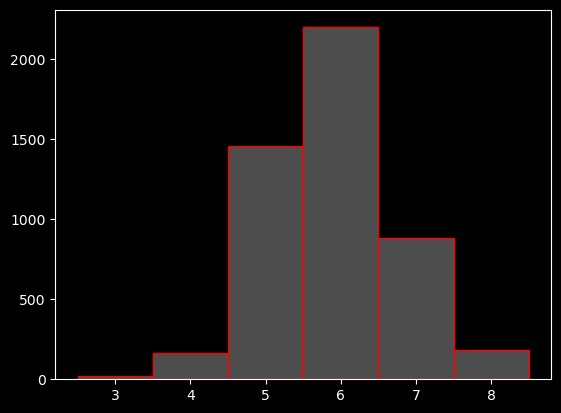

In [173]:
ys = df.values[:, -1]
plt.hist(ys, bins=6, color='.3', histtype='bar', align='left', edgecolor='red')

In [234]:
#next up is the class where its input gonna be a pandas DataFrame
class CustomDataset(Dataset):
    def __init__(self, name, df, train, transform=None, test_size=.2):
        from sklearn.model_selection import train_test_split
        self.name = name
        self.df = df
        self.xy = df.values
        self.xtemp = torch.from_numpy(self.xy[:, :-1])
        self.ytemp = torch.from_numpy(self.xy[:, -1])
        self.transform = transform
        self.train = train
        self.test_size = test_size
        self.x, self.y = self.split()
        self.n_samples = self.x.shape[0]
        
    def split(self):
        X_train, X_test, y_train, y_test = train_test_split(self.xtemp,
                                                            self.ytemp, 
                                                            test_size=self.test_size,
                                                            random_state=42)
        if self.train:
            return X_train, y_train
        else:
            return X_test, y_test
    
    def __repr__(self):
        transform_repr = repr(self.transform) if self.transform else 'None'
        return (f"Dataset {self.name}\n"
                f"    Number of datapoints: {self.n_samples}\n"
                f"    Transform: {transform_repr}")

    #this should do
    def __getitem__(self, index):
        x, y = self.x[index], self.y[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return self.n_samples   

In [235]:
train_dataset = CustomDataset(name='wine', df=df, train=True, test_size=.1)
test_dataset = CustomDataset(name='wine', df=df, train=False, test_size=.1)

In [236]:
train_dataset.y.max(), train_dataset.y.min()

(tensor(9., dtype=torch.float64), tensor(3., dtype=torch.float64))

In [237]:
train_dataset.x.dtype

torch.float64

In [238]:
test_dataset

Dataset wine
    Number of datapoints: 490
    Transform: None

In [239]:
torch.cuda.is_available()

True

In [240]:
for param in model.parameters():
    print(param.dtype)

torch.float32
torch.float32
torch.float32
torch.float32


In [248]:
import torch
import torch.nn.functional as F
from torch import nn, optim, Tensor as t
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import sys

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 11
num_classes = 7
learning_rate = .001
batch_size = 64
num_epochs = 4

train_dataset = CustomDataset(name='wine', df=df, train=True, test_size=.1)
test_dataset = CustomDataset(name='wine', df=df, train=False, test_size=.1)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader =  DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

model = NN(input_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()


optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    return num_samples, num_correct   


def main():
    for epoch in tqdm(range(num_epochs), desc='epoch', leave=True):    
        for batch_idx, (data, targets) in enumerate(tqdm(train_loader, desc='training', leave=True)):
            data = data.to(device=device)
            targets = targets.to(device=device)
            data = data.reshape(data.shape[0], -1)
            optimizer.zero_grad()
            scores = model(data)
            targets = targets.to(torch.int64)
            loss = criterion(scores, targets)
            loss.backward()

            optimizer.step()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [247]:
main()

epoch:   0%|          | 0/4 [00:00<?, ?it/s]

training:   0%|          | 0/69 [00:00<?, ?it/s]

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [245]:
for data, targets in train_loader:
    print(data.dtype, targets.dtype)

torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.float32
torch.float32 torch.